# EM algorithm

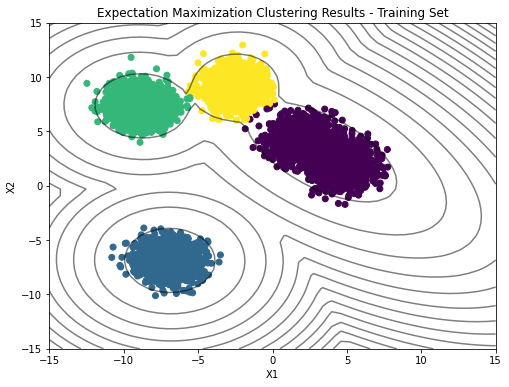

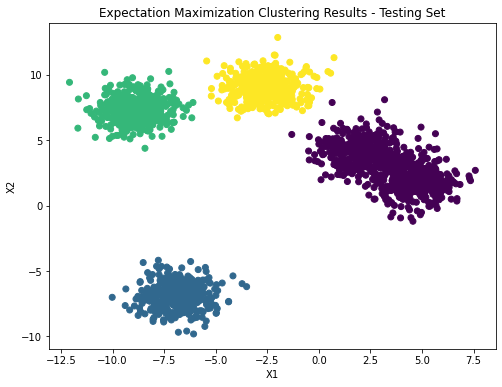

In [24]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

# Generating sample data
X, y_true = make_blobs(n_samples=10000, centers=5, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

# Creating a GaussianMixture object and fitting the data
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X_train)

# Predicting the cluster assignments for each data point
labels = gmm.predict(X)

# Plotting the data and its classification results
y_train = gmm.predict(X_train)

plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.title('Expectation Maximization Clustering Results - Training Set')
plt.xlabel('X1')
plt.ylabel('X2')

# Plotting the contours of the Gaussian distributions
x = np.linspace(-15, 15)
y = np.linspace(-15, 15)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z, levels=20, alpha=0.5, colors='black')

y_test = gmm.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.title('Expectation Maximization Clustering Results - Testing Set')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
